In [1]:
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import scipy.io as io
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from matplotlib import gridspec
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import pickle
import itertools
import glob

In [3]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

In [4]:
import matplotlib.dates as dates
from scipy import stats
from scipy.stats import variation
import math
from sklearn import preprocessing
from scipy.signal import butter, filtfilt
import itertools

In [5]:
import matplotlib.pyplot as plt
#font = {'family': 'serif', 'serif': ['Palatino']}
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [6]:
label_fontsize = 16
title_fontsize = 16

In [7]:
#Set up parameters for figure display
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "heavy"
#pylab.rcParams.update({'figure.autolayout': True})

In [8]:
sns.set(font_scale=1.25, style="whitegrid")

In [9]:
base_dir = '/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/'
beh_files = 'decAlertnessDecisionmaking_JNeuroscience2021/beh_data/csv_files/'
output_dir = 'decAlertnessDecisionmaking_JNeuroscience2021/Figures/'

In [10]:
#read the csv file first (created by process_sdt)
sdt_file = 'sdt.csv'
sdt_data = pd.read_csv(base_dir + beh_files + sdt_file)

In [11]:
sdt_data.head()

,Subj_id,Condition,hit_rate,fa_rate,d_prime,criterion,beta
0,s_02,Alert,0.870968,0.016129,3.272176,0.505110,5.221630
1,s_02,Drowsy,0.710692,0.092593,1.880365,0.384775,2.061673
2,s_04,Alert,0.967742,0.241935,2.548687,-0.574253,0.231404
3,s_04,Drowsy,0.895973,0.293478,1.802187,-0.357842,0.524716
4,s_05,Alert,0.951613,0.112903,2.871930,-0.224733,0.524444


In [12]:
sdt_dprime = sdt_data[['Subj_id', 'Condition', 'd_prime']]
sdt_dprime = sdt_dprime.reset_index().pivot(columns='Condition', index='Subj_id', values='d_prime')
sdt_dprime.head()

Condition,Alert,Drowsy
Subj_id,,
s_02,3.272176,1.880365
s_04,2.548687,1.802187
s_05,2.871930,2.373336
s_06,2.046583,1.772767
s_07,2.389914,2.417233


In [13]:
sdt_criterion = sdt_data[['Subj_id', 'Condition', 'criterion']]
sdt_criterion = sdt_criterion.reset_index().pivot(columns='Condition', index='Subj_id', values='criterion')
sdt_criterion.head()

Condition,Alert,Drowsy
Subj_id,,
s_02,0.505110,0.384775
s_04,-0.574253,-0.357842
s_05,-0.224733,0.477125
s_06,0.034123,0.111818
s_07,-0.205788,-0.026824


In [14]:
#Perform stats on the different parameters..
[dprime_stat,dprime_pval] = stats.ttest_rel(sdt_dprime['Alert'], sdt_dprime['Drowsy'])
[criterion_stat,criterion_pval] = stats.ttest_rel(sdt_criterion['Alert'], sdt_criterion['Drowsy'])
print('Stats on dprime: t-val is ',round(dprime_stat,2), 'p_val is ',round(dprime_pval,4))
print('Stats on criterion: t-val is ',round(criterion_stat,2), 'p_val is ',round(criterion_pval,4))

Stats on dprime: t-val is  6.23 p_val is  0.0
Stats on criterion: t-val is  -1.87 p_val is  0.0713


In [27]:
fig_dir = base_dir + output_dir
fig_dir

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/decArsousalDecisionmaking_JNeuroscience2021/Figures/'

In [16]:
pal = {Condition: "b" if Condition == 'Drowsy' else "r" for Condition in sdt_data.Condition.unique()}

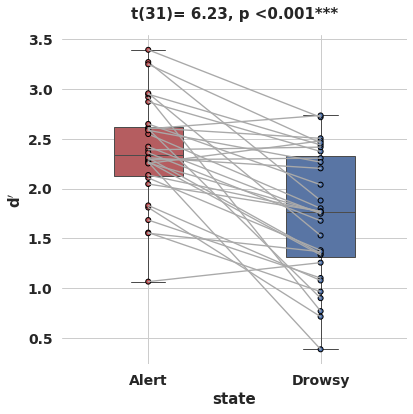

In [42]:
f, ax1 = plt.subplots(nrows =1, ncols=1, figsize=(6, 6))
string_val = 't(31)= ' + str(round(dprime_stat,2)) + ', p' + ' <0.001***'

ax1.text(-0.1, 3.75, string_val, va='center', fontweight='bold',rotation='horizontal')

ax2 = sns.pointplot(x="Condition",y="d_prime",hue='Subj_id',data=sdt_data,ax=ax1, dodge=0.0, scale = 0.5,
                    markers = '', palette=['darkgray'])

ax3 = sns.boxplot(x="Condition", y="d_prime", data=sdt_data, whis=np.inf, ax=ax1, width=0.4, showbox=True,
                  dodge=False,meanline=True,showmeans=False, showfliers=True,showcaps=True,palette=pal,
                  linewidth=1)
sns.stripplot(x="Condition", y="d_prime", data=sdt_data,jitter=False, linewidth=1, ax=ax1,
              edgecolor ="black",palette=pal)

ax1.legend_.remove()

ax1.set(xlabel='state', ylabel='d$^\prime$')


ax1.tick_params(axis='both', which='major', labelsize=label_fontsize-2)

plt.tight_layout()
plt.box(False)
plt.grid(True)

plt.savefig(fig_dir + "sdt_parameter_dprime" + ".png", format='png', dpi=240, transparent=False)

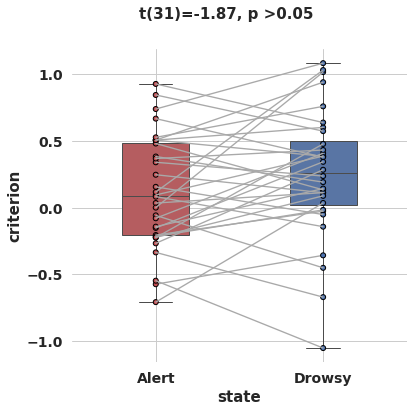

In [48]:
f, ax4 = plt.subplots(nrows =1, ncols=1, figsize=(6, 6))

string_val = 't(31)=' + str(round(criterion_stat,2)) + ', p' + ' >0.05'

ax4.text(-0.1, 1.45, string_val, va='center', fontweight='bold',rotation='horizontal')

ax5 = sns.pointplot(x="Condition",y="criterion",hue='Subj_id',data=sdt_data,ax=ax4, dodge=0.0, scale = 0.5,
                    markers = '', palette=['darkgray'])

ax6 = sns.boxplot(x="Condition", y="criterion", data=sdt_data, whis=np.inf, width=0.4, ax=ax4, showbox=True,
                  dodge=False,meanline=True,showmeans=False, showfliers=True,showcaps=True,palette=pal,
                  linewidth=1)
sns.stripplot(x="Condition", y="criterion", data=sdt_data,jitter=False, linewidth=1, ax=ax4,
              edgecolor ="black",palette=pal)

ax4.legend_.remove()

ax4.set(xlabel='state', ylabel='criterion')

sns.despine(left=True, bottom = True)

ax4.tick_params(axis='both', which='major', labelsize=label_fontsize-2)

plt.tight_layout()
plt.box(False)
plt.grid(True)

plt.savefig(fig_dir + "sdt_parameter_criterion" + ".png", format='png', dpi=240, transparent=False)